## Exploratory Data Analytics (EDA)

#### Import Library

In [1]:
import pandas as pd
import numpy as np
import calendar
import datetime
import seaborn as sns

import matplotlib.pyplot as plt
import seaborn as sns

#### Informasi Dataset

In [2]:
hour_df = pd.read_csv("./dataset/hour.csv")
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [3]:
hour_df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


#### Preprocessing

In [4]:
# Mengubah nama
hour_df.rename(columns={'dteday': 'date', 'yr': 'year', 'mnth': 'month', 'hr': 'hour', 
                        'workingday': 'work_day', 'weathersit': 'weather_sit', 
                        'hum': 'humidity', 'windspeed': 'wind_speed', 'cnt': 'rental_count'}, 
                        inplace=True)

In [5]:
hour_df['weekday'] = hour_df.date.apply(lambda dateString: calendar.day_name[datetime.datetime.strptime(dateString,"%Y-%m-%d").weekday()])
hour_df['week_num'] = hour_df.date.apply(lambda dateString: datetime.datetime.strptime(dateString,"%Y-%m-%d").isocalendar()[1])

In [6]:
hour_df.insert(6, 'week_num', hour_df.pop('week_num'))

In [7]:
hour_df = hour_df.drop(['instant', 'date'], axis=1)

In [8]:
hour_df.head(5)

,season,year,month,hour,week_num,holiday,weekday,work_day,weather_sit,temp,atemp,humidity,wind_speed,casual,registered,rental_count
0,1,0,1,0,52,0,Saturday,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,1,0,1,1,52,0,Saturday,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,1,0,1,2,52,0,Saturday,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,1,0,1,3,52,0,Saturday,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,1,0,1,4,52,0,Saturday,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [9]:
hour_df.describe()

,season,year,month,hour,week_num,holiday,work_day,weather_sit,temp,atemp,humidity,wind_speed,casual,registered,rental_count
count,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,2.501640,0.502561,6.537775,11.546752,26.601933,0.028770,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,1.106918,0.500008,3.438776,6.914405,15.017005,0.167165,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,4.000000,6.000000,14.000000,0.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,3.000000,1.000000,7.000000,12.000000,27.000000,0.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,3.000000,1.000000,10.000000,18.000000,40.000000,0.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,4.000000,1.000000,12.000000,23.000000,52.000000,1.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


Dari keempat musim, rata-rata yang ditemukan adalah 2.5, yang mengindikasikan bahwa salah satu atau dua musim terakhir lebih populer dengan sedikit perbedaan. Dari dua tahun dalam dataset, rata-rata sedikit lebih cenderung ke tahun pertama. Dalam hal bulan, sekali lagi, rata-rata sedikit lebih condong ke bulan-bulan terakhir, tetapi tidak terlalu signifikan. Weather_sit menunjukkan rata-rata yang agak rendah, yang seharusnya menandakan kecenderungan menuju cuaca yang lebih baik (dengan weather_sit 1 sebagai kondisi cuaca yang paling jelas dari keempat kondisi cuaca tersebut). Rata-rata pengguna biasa adalah sekitar 36 dan rata-rata pengguna terdaftar adalah sekitar 154.

#### Analisis dan Visualisasi

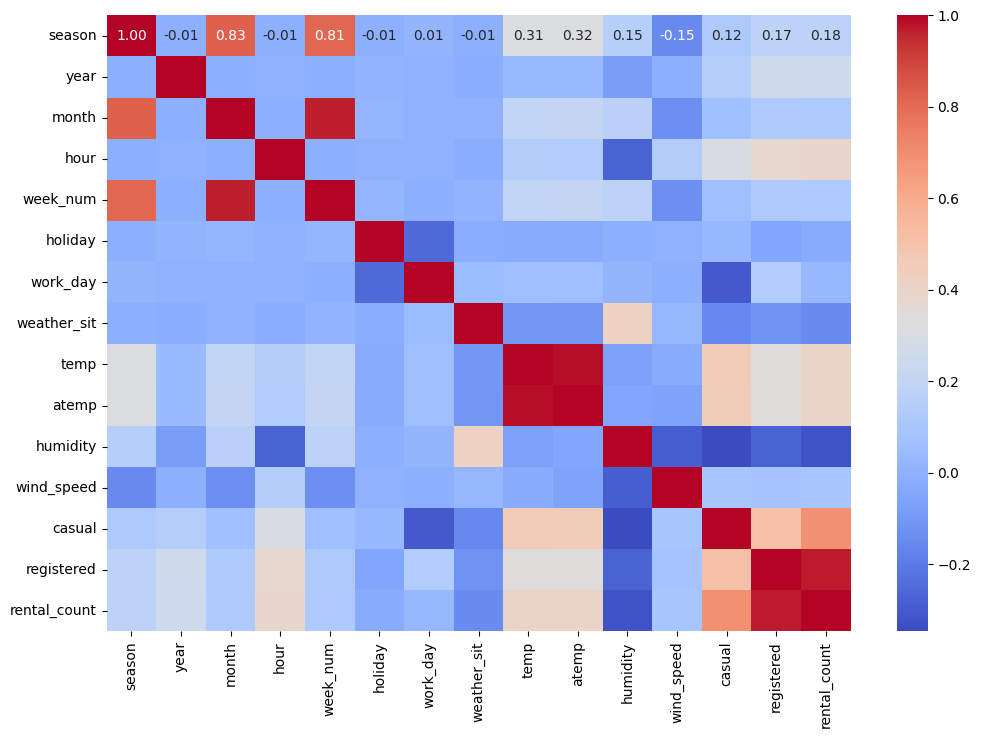

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

# Menghitung korelasi
df_2 = hour_df.drop(['weekday'], axis=1)
corr = df_2.corr()

# Membuat heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")

# Menampilkan heatmap
plt.show()

In [11]:
hour_df['s1_daylight_hrs'] = hour_df.apply(lambda x: 1 if (x['hour'] > 7 and x['hour'] < 19 and x['season'] == 1) else 0, axis=1)
hour_df['s2_daylight_hrs'] = hour_df.apply(lambda x: 1 if (x['hour'] > 6 and x['hour'] < 20 and x['season'] == 2) else 0, axis=1)
hour_df['s3_daylight_hrs'] = hour_df.apply(lambda x: 1 if (x['hour'] > 5 and x['hour'] < 21 and x['season'] == 3) else 0, axis=1)
hour_df['s4_daylight_hrs'] = hour_df.apply(lambda x: 1 if (x['hour'] > 7 and x['hour'] < 19 and x['season'] == 4) else 0, axis=1)

In [12]:
hour_df['midnight'] = np.where(hour_df['hour'].between(23, 2, inclusive='right'), 1, 0)
hour_df['early_morning'] = np.where(hour_df['hour'].between(2, 6, inclusive='right'), 1, 0)
hour_df['morning'] = np.where(hour_df['hour'].between(6, 9, inclusive='right'), 1, 0)
hour_df['late_morning'] = np.where(hour_df['hour'].between(9, 12, inclusive='right'), 1, 0)
hour_df['afternoon'] = np.where(hour_df['hour'].between(12, 16, inclusive='right'), 1, 0)
hour_df['late_afternoon'] = np.where(hour_df['hour'].between(16, 17, inclusive='right'), 1, 0)
hour_df['early_evening'] = np.where(hour_df['hour'].between(17, 19, inclusive='right'), 1, 0)
hour_df['evening'] = np.where(hour_df['hour'].between(19, 21, inclusive='right'), 1, 0)
hour_df['late_evening'] = np.where(hour_df['hour'].between(21, 23, inclusive='right'), 1, 0)

In [13]:
season_registered = hour_df.groupby(['season'])['registered'].sum()
season_casual = hour_df.groupby(['season'])['casual'].sum()
season_registered = season_registered / season_registered.sum()
season_casual = season_casual / season_casual.sum()

season_registered = season_registered.reset_index()
season_casual = season_casual.reset_index()

In [14]:
season_registered

,season,registered
0,1,0.153677
1,2,0.267549
2,3,0.312437
3,4,0.266338


In [15]:
season_casual

,season,casual
0,1,0.097775
1,2,0.328252
2,3,0.364653
3,4,0.209320


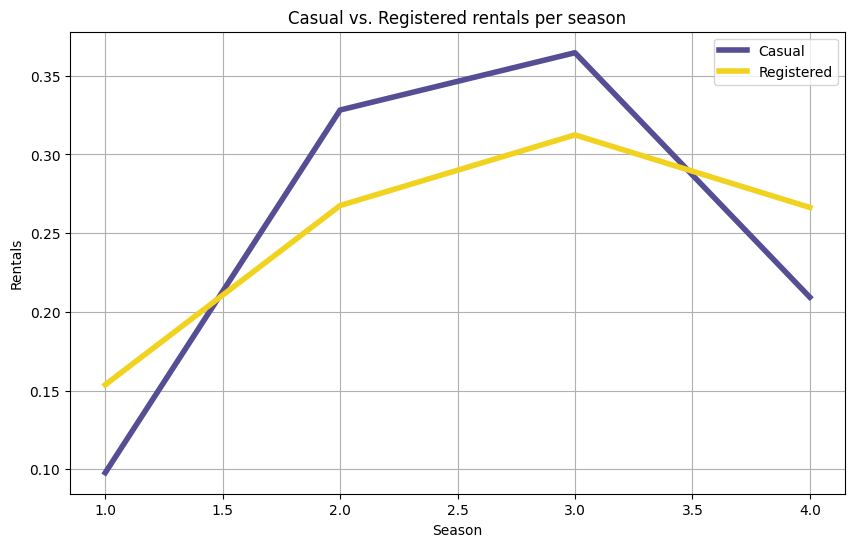

In [16]:
import matplotlib.pyplot as plt

# Data
seasons = season_casual['season']
casual_rentals = season_casual['casual']
registered_rentals = season_registered['registered']

# Membuat plot
plt.figure(figsize=(10, 6))
plt.plot(seasons, casual_rentals, label='Casual', color='#564E95', linewidth=4)
plt.plot(seasons, registered_rentals, label='Registered', color='#F1D31F', linewidth=4)

# Menambahkan judul dan label sumbu
plt.title('Casual vs. Registered rentals per season')
plt.xlabel('Season')
plt.ylabel('Rentals')

# Menambahkan legenda
plt.legend()
plt.grid(True)

# Menampilkan plot
plt.show()


In [17]:
df_casual_avg = hour_df.groupby(['season', 'year']).agg({'casual': 'mean'}).reset_index()
df_casual_avg.rename(columns={'casual': 'casual_avg'}, inplace=True)
df_casual_avg

,season,year,casual_avg
0,1,0,10.360251
1,1,1,18.029899
2,2,0,35.208352
3,2,1,57.097915
4,3,0,42.611607
5,3,1,57.908245
6,4,0,24.748360
7,4,1,36.686845


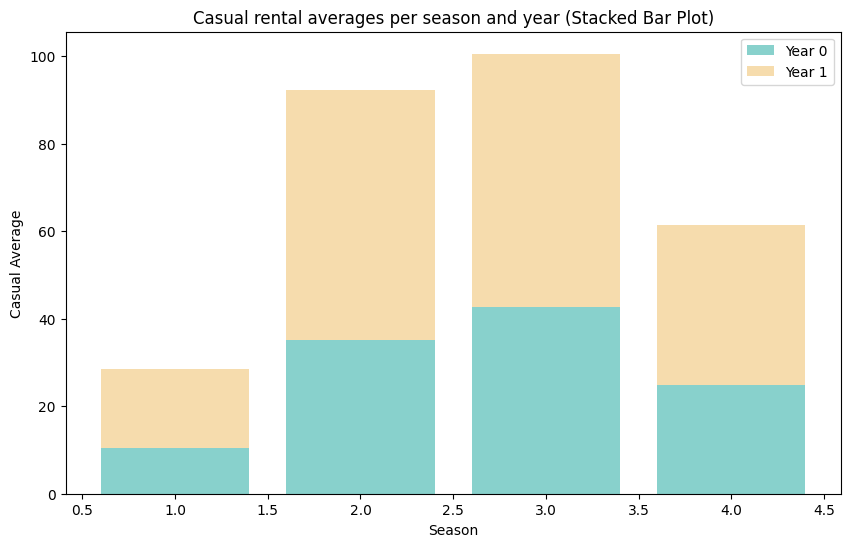

In [18]:
import matplotlib.pyplot as plt

# Data
seasons = [1, 2, 3, 4]
year_0_data = [10.360251, 35.208352, 42.611607, 24.748360]
year_1_data = [18.029899, 57.097915, 57.908245, 36.686845]

# Membuat plot
plt.figure(figsize=(10, 6))
bar1 = plt.bar(seasons, year_0_data, label='Year 0', color='#88D1CC')
bar2 = plt.bar(seasons, year_1_data, bottom=year_0_data, label='Year 1', color='#F6DCAD')

# Menambahkan judul dan label sumbu
plt.title('Casual rental averages per season and year (Stacked Bar Plot)')
plt.xlabel('Season')
plt.ylabel('Casual Average')

# Menambahkan legenda
plt.legend()

# Menampilkan plot
plt.show()

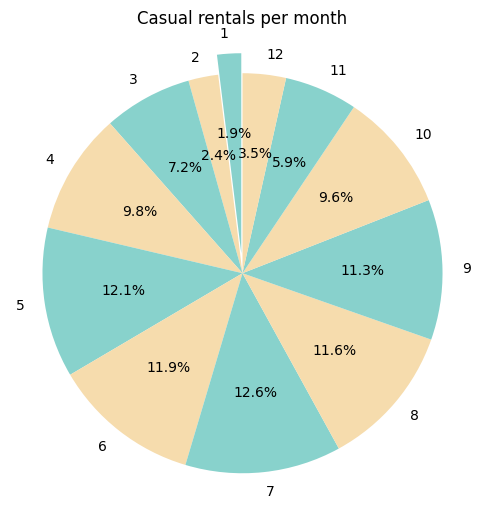

In [19]:
import matplotlib.pyplot as plt

df_casual_month = hour_df.groupby(['month']).agg({'casual': 'sum'}).reset_index()
df_casual_month.rename(columns={'casual': 'casual_sum'}, inplace=True)

# Data
casual_sum = df_casual_month['casual_sum']
months = df_casual_month['month']

# Colors for the pie chart
colors = ['#88D1CC', '#F6DCAD', '#88D2CC', '#F6DCAD', '#88D2CC', '#F6DCAD', '#88D2CC', '#F6DCAD']

# Create an explode list to emphasize the first slice (January)
explode = [0.1 if i == 0 else 0 for i in range(len(months))]

# Create a pie chart
plt.figure(figsize=(6, 6))
plt.pie(casual_sum, labels=months, colors=colors, autopct='%1.1f%%', startangle=90, explode=explode)

# Add a title
plt.title('Casual rentals per month')

# Display the pie chart
plt.axis('equal')  # To ensure the pie chart is circular

# Show the plot
plt.show()

In [20]:

df_casual_hour_season = hour_df.groupby(['hour', 'season']).agg({'casual': 'sum'}).reset_index()
df_casual_hour_season.rename(columns={'casual': 'casual_sum'}, inplace=True)
df_casual_hour_season


,hour,season,casual_sum
0,0,1,604
1,0,2,2282
2,0,3,3093
3,0,4,1396
4,1,1,416
...,...,...,...
91,22,4,2702
92,23,1,814
93,23,2,3581
94,23,3,4739


In [21]:
import plotly.express as px 

df_casual_hour_season = hour_df.groupby(['hour', 'season']).agg({'casual': 'sum'}).reset_index()
df_casual_hour_season.rename(columns={'casual': 'casual_sum'}, inplace=True)
df_casual_hour_season

fig = px.line(df_casual_hour_season, x='hour', y='casual_sum', color='season', title='Casual rentals per hour and season')
fig.update_traces(line=dict(width=4), mode='lines+markers')
fig.update_traces(line_color='#FCEE9E', selector=dict(name='1'))
fig.update_traces(line_color='#F2D499', selector=dict(name='2'))
fig.update_traces(line_color='#8D9EC7', selector=dict(name='3'))
fig.update_traces(line_color='#A4CEDB', selector=dict(name='4'))
fig.show()


In [23]:
df_holiday_casual = hour_df.groupby(['holiday']).agg({'casual': 'sum'}).reset_index()
df_holiday_casual.rename(columns={'casual': 'casual_sum'}, inplace=True)

fig = px.pie(df_holiday_casual, values='casual_sum', names='holiday', title='Casual rentals per holiday', hole=0.3, color_discrete_sequence=px.colors.sequential.Emrld)
fig.update_layout(height=600, width=600)
fig.show()

In [25]:
df_workday_casual = hour_df.groupby(['work_day']).agg({'casual': 'sum'}).reset_index()
df_workday_casual.rename(columns={'casual': 'casual_sum'}, inplace=True)

fig = px.pie(df_workday_casual, values='casual_sum', names='work_day', title='Casual rentals per work day', hole=0.3, color_discrete_sequence=px.colors.sequential.Emrld)
fig.update_layout(height=600, width=600)
fig.show()

In [26]:
df_casual_weekday = hour_df.groupby(['weekday']).agg({'casual': 'sum'}).reset_index()
df_casual_weekday.rename(columns={'casual': 'casual_sum'}, inplace=True)

fig = px.bar(df_casual_weekday, x='weekday', y='casual_sum', color='weekday', title='Casual rentals per weekday', color_discrete_sequence=px.colors.sequential.Emrld)
fig.update_layout(height=600, width=1250)
fig.show()

In [32]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

df_casual_reg_wind = hour_df.groupby(['temp']).agg({'casual': 'sum', 'registered': 'sum'}).reset_index()
df_casual_reg_wind.rename(columns={'casual': 'casual_sum', 'registered': 'registered_sum'}, inplace=True)

fig = make_subplots(specs=[[{"secondary_y": True}]])
fig.add_trace(go.Scatter(x=df_casual_reg_wind.temp, y=df_casual_reg_wind.casual_sum, name='Casual', line=dict(color='#F2D499', width=4)))
fig.add_trace(go.Scatter(x=df_casual_reg_wind.temp, y=df_casual_reg_wind.registered_sum, name='Registered', line=dict(color='#8D9EC7', width=4)), secondary_y=True)
fig.update_layout(title='Casual vs. registered rentals per temperature value', xaxis_title='Ambient temperature', yaxis_title='Sum of rentals')
fig.update_layout(height=600, width=1250)
fig.show()

In [34]:
df_casual_reg_humid = hour_df.groupby(['humidity']).agg({'casual': 'sum', 'registered': 'sum'}).reset_index()
df_casual_reg_humid.rename(columns={'casual': 'casual_sum', 'registered': 'registered_sum'}, inplace=True)

fig = make_subplots(specs=[[{"secondary_y": True}]])
fig.add_trace(go.Scatter(x=df_casual_reg_humid.humidity, y=df_casual_reg_humid.casual_sum, name='Casual', line=dict(color='#F2D499', width=4)))
fig.add_trace(go.Scatter(x=df_casual_reg_humid.humidity, y=df_casual_reg_humid.registered_sum, name='Registered', line=dict(color='#8D9EC7', width=4)), secondary_y=True)
fig.update_layout(title='Casual vs. registered rentals per humidity', xaxis_title='Humidity', yaxis_title='Sum of rentals')
fig.update_layout(height=600, width=1250)
fig.show()

In [36]:
df_midnight_weekday = hour_df.groupby(['midnight', 'weekday']).agg({'casual': 'sum'}).reset_index()
df_midnight_weekday.rename(columns={'casual': 'casual_sum'}, inplace=True)

df_early_morning_weekday = hour_df.groupby(['early_morning', 'weekday']).agg({'casual': 'sum'}).reset_index()
df_early_morning_weekday.rename(columns={'casual': 'casual_sum'}, inplace=True)

df_morning_weekday = hour_df.groupby(['morning', 'weekday']).agg({'casual': 'sum'}).reset_index()
df_morning_weekday.rename(columns={'casual': 'casual_sum'}, inplace=True)

df_late_morning_weekday = hour_df.groupby(['late_morning', 'weekday']).agg({'casual': 'sum'}).reset_index()
df_late_morning_weekday.rename(columns={'casual': 'casual_sum'}, inplace=True)

df_afternoon_weekday = hour_df.groupby(['afternoon', 'weekday']).agg({'casual': 'sum'}).reset_index()
df_afternoon_weekday.rename(columns={'casual': 'casual_sum'}, inplace=True)

df_late_afternoon_weekday = hour_df.groupby(['late_afternoon', 'weekday']).agg({'casual': 'sum'}).reset_index()
df_late_afternoon_weekday.rename(columns={'casual': 'casual_sum'}, inplace=True)

df_early_evening_weekday = hour_df.groupby(['early_evening', 'weekday']).agg({'casual': 'sum'}).reset_index()
df_early_evening_weekday.rename(columns={'casual': 'casual_sum'}, inplace=True)

df_evening_weekday = hour_df.groupby(['evening', 'weekday']).agg({'casual': 'sum'}).reset_index()
df_evening_weekday.rename(columns={'casual': 'casual_sum'}, inplace=True)

df_late_evening_weekday = hour_df.groupby(['late_evening', 'weekday']).agg({'casual': 'sum'}).reset_index()
df_late_evening_weekday.rename(columns={'casual': 'casual_sum'}, inplace=True)

fig = make_subplots(rows=3, cols=3, subplot_titles=("Midnight", "Early morning", "Morning", "Late morning", "Afternoon", "Late afternoon", "Early evening", "Evening", "Late evening"))

fig.add_trace(go.Bar(x=df_midnight_weekday.weekday, y=df_midnight_weekday.casual_sum, name='Casual', marker_color='#E1E4DF'), row=1, col=1)
fig.add_trace(go.Bar(x=df_early_morning_weekday.weekday, y=df_early_morning_weekday.casual_sum, name='Casual', marker_color='#E6C4DF'), row=1, col=2)
fig.add_trace(go.Bar(x=df_morning_weekday.weekday, y=df_morning_weekday.casual_sum, name='Casual', marker_color='#F6D9BE'), row=1, col=3)
fig.add_trace(go.Bar(x=df_late_morning_weekday.weekday, y=df_late_morning_weekday.casual_sum, name='Casual', marker_color='#EEC39C'), row=2, col=1)
fig.add_trace(go.Bar(x=df_afternoon_weekday.weekday, y=df_afternoon_weekday.casual_sum, name='Casual', marker_color='#ABE0D6'), row=2, col=2)
fig.add_trace(go.Bar(x=df_late_afternoon_weekday.weekday, y=df_late_afternoon_weekday.casual_sum, name='Casual', marker_color='#71C9B0'), row=2, col=3)
fig.add_trace(go.Bar(x=df_early_evening_weekday.weekday, y=df_early_evening_weekday.casual_sum, name='Casual', marker_color='#E6CEC6'), row=3, col=1)
fig.add_trace(go.Bar(x=df_evening_weekday.weekday, y=df_evening_weekday.casual_sum, name='Casual'), row=3, col=2)
fig.add_trace(go.Bar(x=df_late_evening_weekday.weekday, y=df_late_evening_weekday.casual_sum, name='Casual'), row=3, col=3)

fig.update_layout(height=800, width=1150, title_text="Casual rentals per time of day and weekday")
fig.layout.title.x = 0.5
fig.update_layout(showlegend=False)

fig.show()